## Bank_Marketing_Project
This dataset is public available for research.  
Citations -  
1.Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014  
2.Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [1]:
## Import required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
## read csv
df = pd.read_csv('bank.csv',delimiter=';')
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [3]:
df.rename(columns={'y':'deposit'},inplace=True)

In [4]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  cellular   19   oct        79         1     -1         0  unknown      no  
1  cellular   11   may       220         1    339         4  failure      no  
2  cellular   16   apr       185         1    330         1  failure      no  
3   unknown    3   jun       199         4     -1         0  unknown      no  
4   unknown    5   may       226         1     -1         0  unknown      no

In [5]:
## checking the missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
## Analysing the categorical values 

In [7]:
df.head(1)

age         job  marital education default  balance housing loan   contact  \
0   30  unemployed  married   primary      no     1787      no   no  cellular   

   day month  duration  campaign  pdays  previous poutcome deposit  
0   19   oct        79         1     -1         0  unknown      no

In [8]:
cat_columns = df[['job','marital','education','default','housing','loan','contact','month','poutcome']]

In [9]:
cat_columns.head()

job  marital  education default housing loan   contact month  \
0   unemployed  married    primary      no      no   no  cellular   oct   
1     services  married  secondary      no     yes  yes  cellular   may   
2   management   single   tertiary      no     yes   no  cellular   apr   
3   management  married   tertiary      no     yes  yes   unknown   jun   
4  blue-collar  married  secondary      no     yes   no   unknown   may   

  poutcome  
0  unknown  
1  failure  
2  failure  
3  unknown  
4  unknown

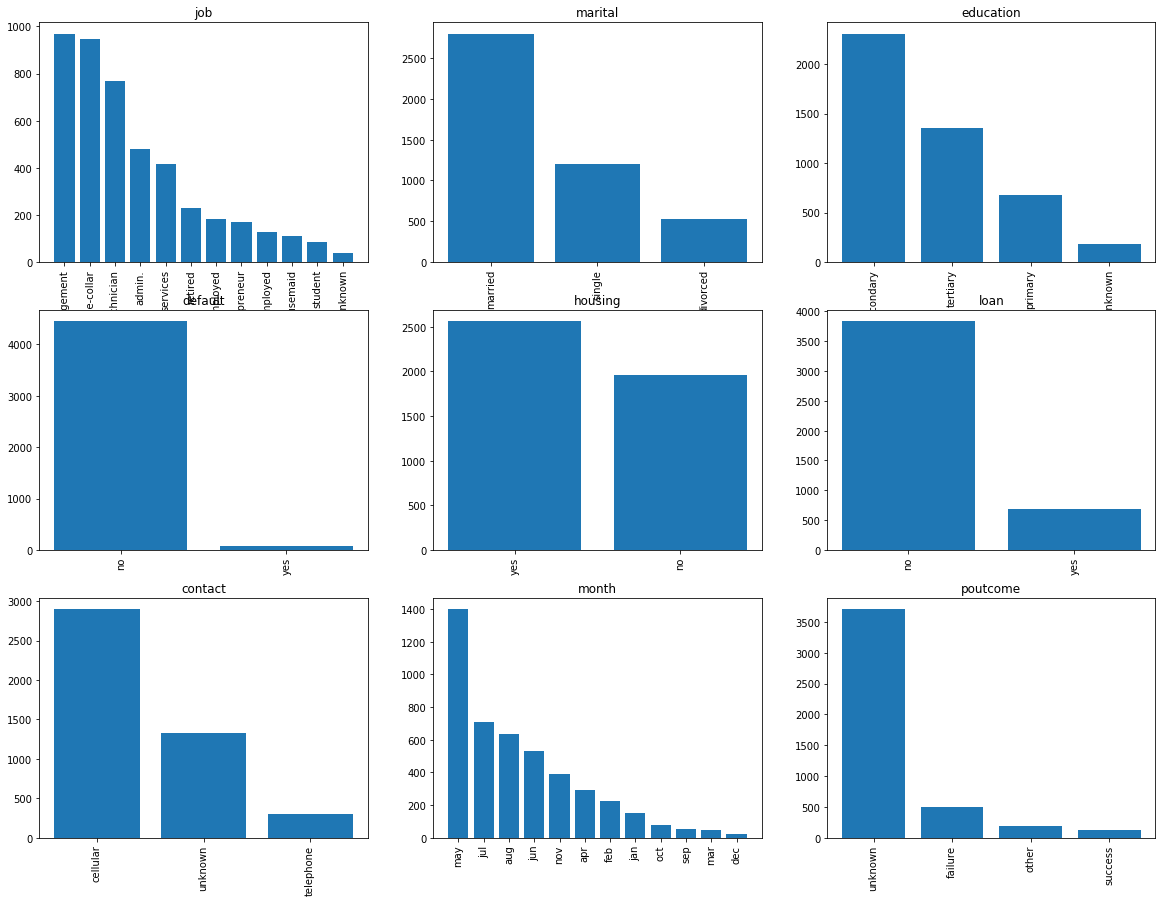

In [10]:
## plotting the subplot
fig, axs = plt.subplots(3,3,figsize=(20,15))

counter = 0
for cat_column in cat_columns :
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0,len(value_counts))  # creates array of the indexes
    
    axs[trace_x,trace_y].bar(x_pos,value_counts.values,tick_label = value_counts.index)
    axs[trace_x,trace_y].set_title(cat_column)
    
    for tick in axs[trace_x,trace_y].get_xticklabels() :
        tick.set_rotation(90)
        
    counter += 1
plt.show()
    
    


In [11]:
## Looking for the numerical columns
df.head(1)

age         job  marital education default  balance housing loan   contact  \
0   30  unemployed  married   primary      no     1787      no   no  cellular   

   day month  duration  campaign  pdays  previous poutcome deposit  
0   19   oct        79         1     -1         0  unknown      no

In [12]:
df[['age','balance','day','duration','campaign','pdays','previous']].describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [13]:
## checking the outliers
len(df[df['pdays'] >400 ])/len(df) *100

0.57509400575094

In [14]:
len(df[df['campaign'] >34 ])/len(df) *100

0.04423800044238001

In [15]:
len(df[df['previous'] >34 ])/len(df) *100

0.0

On going

In [16]:
## Analysis of the target variable 

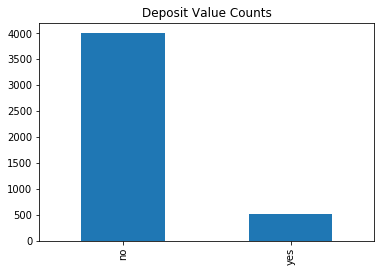

In [17]:
value_counts = df['deposit'].value_counts()
value_counts.plot.bar(title = 'Deposit Value Counts')
plt.show()

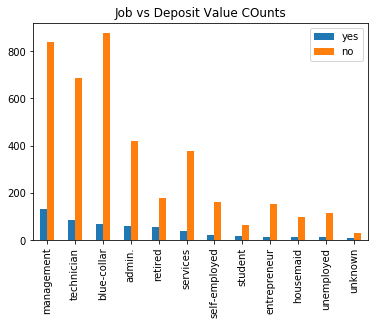

In [18]:
## Multivariet analysis (Cat_Columns)
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit']=='yes']['job'].value_counts()
j_df['no'] = df[df['deposit']=='no']['job'].value_counts()

j_df.plot.bar(title='Job vs Deposit Value COunts')
plt.show()

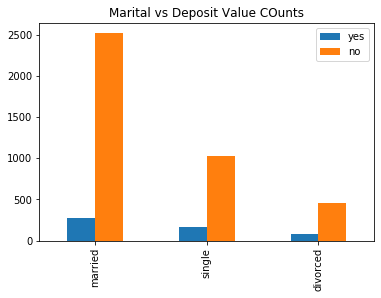

In [19]:
## Multivariet analysis (Cat_Columns)
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit']=='yes']['marital'].value_counts()
j_df['no'] = df[df['deposit']=='no']['marital'].value_counts()

j_df.plot.bar(title='Marital vs Deposit Value COunts')
plt.show()

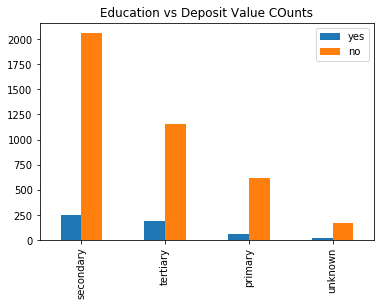

In [20]:
## Multivariet analysis (Cat_Columns)
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit']=='yes']['education'].value_counts()
j_df['no'] = df[df['deposit']=='no']['education'].value_counts()

j_df.plot.bar(title='Education vs Deposit Value COunts')
plt.show()

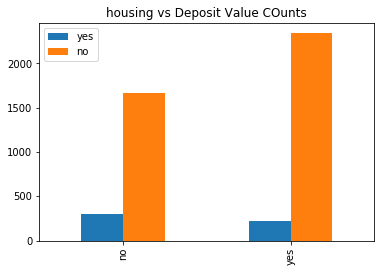

In [21]:
## Multivariet analysis (Cat_Columns)
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit']=='yes']['housing'].value_counts()
j_df['no'] = df[df['deposit']=='no']['housing'].value_counts()

j_df.plot.bar(title='housing vs Deposit Value COunts')
plt.show()

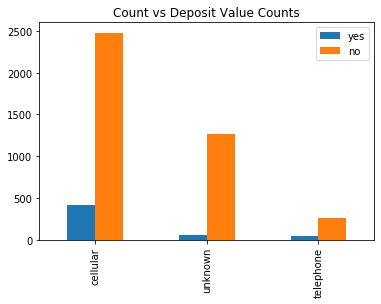

In [22]:
## Multivariet analysis (Cat_Columns)
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit']=='yes']['contact'].value_counts()
j_df['no'] = df[df['deposit']=='no']['contact'].value_counts()

j_df.plot.bar(title='Count vs Deposit Value Counts')
plt.show()

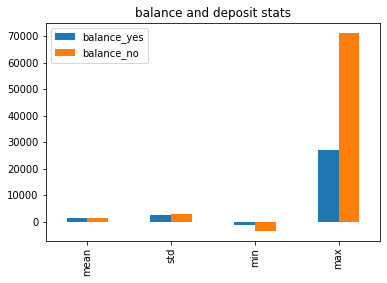

In [23]:
## Multivariet analysis on the numerical columns
b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit']=='yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit']=='no'][['deposit','balance']].describe())['balance']

b_df.drop(['count','25%','50%','75%']).plot.bar(title='balance and deposit stats')
plt.show()

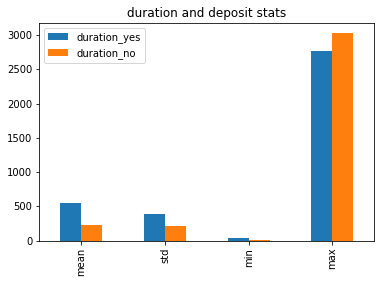

In [24]:
## Multivariet analysis on the numerical columns
b_df = pd.DataFrame()
b_df['duration_yes'] = (df[df['deposit']=='yes'][['deposit','duration']].describe())['duration']
b_df['duration_no'] = (df[df['deposit']=='no'][['deposit','duration']].describe())['duration']

b_df.drop(['count','25%','50%','75%']).plot.bar(title='duration and deposit stats')
plt.show()

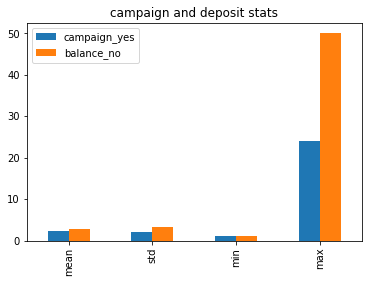

In [25]:
## Multivariet analysis on the numerical columns
b_df = pd.DataFrame()
b_df['campaign_yes'] = (df[df['deposit']=='yes'][['deposit','campaign']].describe())['campaign']
b_df['balance_no'] = (df[df['deposit']=='no'][['deposit','campaign']].describe())['campaign']

b_df.drop(['count','25%','50%','75%']).plot.bar(title='campaign and deposit stats')
plt.show()

### Data Cleaning ( Main Step)
We need to remove columns that are not necessary for prediction, also outliers that are to be eliminated. We also need to get dummies for our categorical columns

In [26]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = df.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [27]:
cleaned_df = clean_data(df)
cleaned_df.head()

age  balance  day  duration  default_bool  housing_bool  loan_bool  \
0   30     1787   19        79             0             0          0   
1   33     4789   11       220             0             1          1   
2   35     1350   16       185             0             1          0   
3   30     1476    3       199             0             1          1   
4   59        0    5       226             0             1          0   

   deposit_bool  job_blue-collar  job_entrepreneur  ...  month_mar  month_may  \
0             0                0                 0  ...          0          0   
1             0                0                 0  ...          0          1   
2             0                0                 0  ...          0          0   
3             0                0                 0  ...          0          0   
4             0                1                 0  ...          0          1   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0          0          1          0               0                 0   
1          0          0          0               0                 0   
2          0          0          0               0                 0   
3          0          0          0               0                 0   
4          0          0          0               0                 0   

   poutcome_unknown  campaign_cleaned  previous_cleaned  
0                 1               1.0                 0  
1                 0               1.0                 4  
2                 0               1.0                 1  
3                 1               4.0                 0  
4                 1               1.0                 0  

[5 rows x 42 columns]

### Machine Learning 

In [28]:
x = cleaned_df.drop(columns='deposit_bool')
y = cleaned_df['deposit_bool']

TEST_SIZE = 0.3
RAND_STATE = 42

from sklearn.model_selection import train_test_split as tts

In [29]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=TEST_SIZE,random_state=RAND_STATE)

In [30]:
x_train

age  balance  day  duration  default_bool  housing_bool  loan_bool  \
4153   42      440    3        13             0             1          0   
2085   33      -77   28       151             0             1          0   
1891   32      656   20       148             0             1          1   
3611   28      389   11        15             0             1          0   
4015   36     5902   23       219             0             1          0   
...   ...      ...  ...       ...           ...           ...        ...   
4426   41     1536    4        54             0             0          0   
466    34     -370   21       748             0             1          0   
3092   46      523    6       105             0             1          0   
3772   47      440   21        71             0             0          0   
860    58      309   19       156             0             0          0   

      job_blue-collar  job_entrepreneur  job_housemaid  ...  month_mar  \
4153                0                 0              0  ...          0   
2085                1                 0              0  ...          0   
1891                0                 0              0  ...          0   
3611                0                 0              0  ...          0   
4015                0                 0              0  ...          0   
...               ...               ...            ...  ...        ...   
4426                0                 0              0  ...          0   
466                 0                 0              0  ...          0   
3092                0                 0              0  ...          0   
3772                0                 0              0  ...          0   
860                 1                 0              0  ...          0   

      month_may  month_nov  month_oct  month_sep  poutcome_other  \
4153          0          0          0          0               0   
2085          0          0          0          0               0   
1891          0          0          0          0               0   
3611          1          0          0          0               0   
4015          1          0          0          0               0   
...         ...        ...        ...        ...             ...   
4426          1          0          0          0               0   
466           1          0          0          0               0   
3092          1          0          0          0               0   
3772          0          0          0          0               0   
860           0          0          0          0               0   

      poutcome_success  poutcome_unknown  campaign_cleaned  previous_cleaned  
4153                 0                 1               5.0                 0  
2085                 0                 1               3.0                 0  
1891                 0                 1               2.0                 0  
3611                 0                 1               7.0                 0  
4015                 0                 1               4.0                 0  
...                ...               ...               ...               ...  
4426                 0                 1               2.0                 0  
466                  0                 1               1.0                 0  
3092                 0                 0               4.0                 2  
3772                 0                 1               4.0                 0  
860                  0                 1               2.0                 0  

[3164 rows x 41 columns]

In [31]:
y_train

4153    0
2085    0
1891    0
3611    0
4015    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: deposit_bool, Length: 3164, dtype: int64

In [33]:
# !pip install xgboost

You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [34]:
import xgboost

In [37]:
xgb = xgboost.XGBClassifier(n_estimators=100,learning_rate = 0.08,gamma=0,subsample=0.75,colsample_bytree=1,maxdepth=7)

In [38]:
xgb.fit(x_train,y_train.squeeze().values)

[20:14:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { maxdepth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.08, max_delta_step=0, max_depth=6, maxdepth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_train_pred = xgb.predict(x_train)

In [44]:
y_test_pred = xgb.predict(x_test)

In [48]:
## Checking the accuracy 
from sklearn.metrics import accuracy_score
print('XGB accuracy for training set was : % 3f and for test set : % 3f ' %(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred)))

XGB accuracy for training set was :  0.968078 and for test set :  0.904937 
